# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Marihot Josua Tambunan]
- **Email:** [marihottambunan37@gmail.com]
- **ID Dicoding:** [mc114d5y1977]

## Menentukan Pertanyaan Bisnis


- gimana tren peminjaman sepeda berdasarkan hari dalam seminggu?
- bagaimana distribusi peminjaman sepeda berdasarkan jam dalam sehari?
- apakah ada korelasi antara suhu dan jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [11]:
# Load data day.csv
day_df = pd.read_csv(r'D:\DBS\submission\data\day.csv')
day_df.head()

# Load data hour.csv
hour_df = pd.read_csv(r'D:\DBS\submission\data\hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

- Data day.csv berisi informasi peminjaman sepeda per hari.
- Data hour.csv berisi informasi peminjaman sepeda per jam.

### Assessing Data

In [12]:
# Mengidentifikasi kualitas data
print("Informasi Dataset Day:")
day_df.info()
print("\nStatistik Deskriptif Day Dataset:")
day_df.describe()

print("\nInformasi Dataset Hour:")
hour_df.info()
print("\nStatistik Deskriptif Hour Dataset:")
hour_df.describe()

# Mengecek missing values
print("\nMissing Values Day Dataset:")
print(day_df.isnull().sum())
print("\nMissing Values Hour Dataset:")
print(hour_df.isnull().sum())

Informasi Dataset Day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Statistik Deskriptif Day Dataset:

Informasi Dataset Hour:
<class 'pa

**Insight:**
- Dataset `day_df` memiliki 731 baris dan 16 kolom.
- Dataset `hour_df` memiliki 17379 baris dan 17 kolom.
- Kolom-kolom pada `day_df` meliputi:
     - `instant`: indeks unik.
     - `dteday`: tanggal.
     - `season`: musim (1:springer, 2:summer, 3:fall, 4:winter).
     - `yr`: tahun (0: 2011, 1:2012).
     - `mnth`: bulan (1 hingga 12).
     - `holiday`: apakah hari libur atau tidak (0: tidak, 1: ya).
     - `weekday`: hari dalam seminggu (0: Minggu, 1: Senin, ..., 6: Sabtu).
     - `workingday`: apakah hari kerja atau tidak (0: tidak, 1: ya).
     - `weathersit`: kondisi cuaca (1: Clear, Few clouds, Partly cloudy, Partly cloudy; 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist; 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds; 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog).
     - `temp`: suhu yang dinormalisasi dalam Celcius.
     - `atemp`: suhu "feels like" yang dinormalisasi dalam Celcius.
     - `hum`: kelembapan yang dinormalisasi.
     - `windspeed`: kecepatan angin yang dinormalisasi.
     - `casual`: jumlah pengguna kasual.
     - `registered`: jumlah pengguna terdaftar.
     - `cnt`: jumlah total penyewaan sepeda.
 - Kolom-kolom pada `hour_df` meliputi semua kolom di `day_df` kecuali `dteday`, ditambah dengan:
     - `hr`: jam (0 hingga 23).
 - Tidak terdapat *missing values* pada kedua dataset, sehingga tidak perlu dilakukan penanganan *missing values*.
 - Tipe data pada kedua dataset sudah sesuai dengan informasi yang diwakili, seperti integer untuk jumlah penyewaan, float untuk suhu dan kelembapan, dan object untuk tanggal.
 - Statistik deskriptif seperti rata-rata, standar deviasi, nilai minimum, dan maksimum memberikan gambaran awal tentang distribusi data pada setiap kolom numerik.
 - Informasi ini akan membantu dalam tahap analisis dan visualisasi data selanjutnya.

### Cleaning Data

In [13]:
day_df = day_df.dropna()  # menghapus baris dengan missing values
hour_df = hour_df.dropna()  # menghapus baris dengan missing values

**Insight:**
- Data sudah bersih dan siap untuk dianalisis.

## Exploratory Data Analysis (EDA)

### Explore ...


Agregasi Peminjaman Sepeda Berdasarkan Hari:
   weekday         mean  median     sum
0        0  4228.828571  4334.0  444027
1        1  4338.123810  4359.0  455503
2        2  4510.663462  4576.5  469109
3        3  4548.538462  4642.5  473048
4        4  4667.259615  4721.0  485395
5        5  4690.288462  4601.5  487790
6        6  4550.542857  4521.0  477807


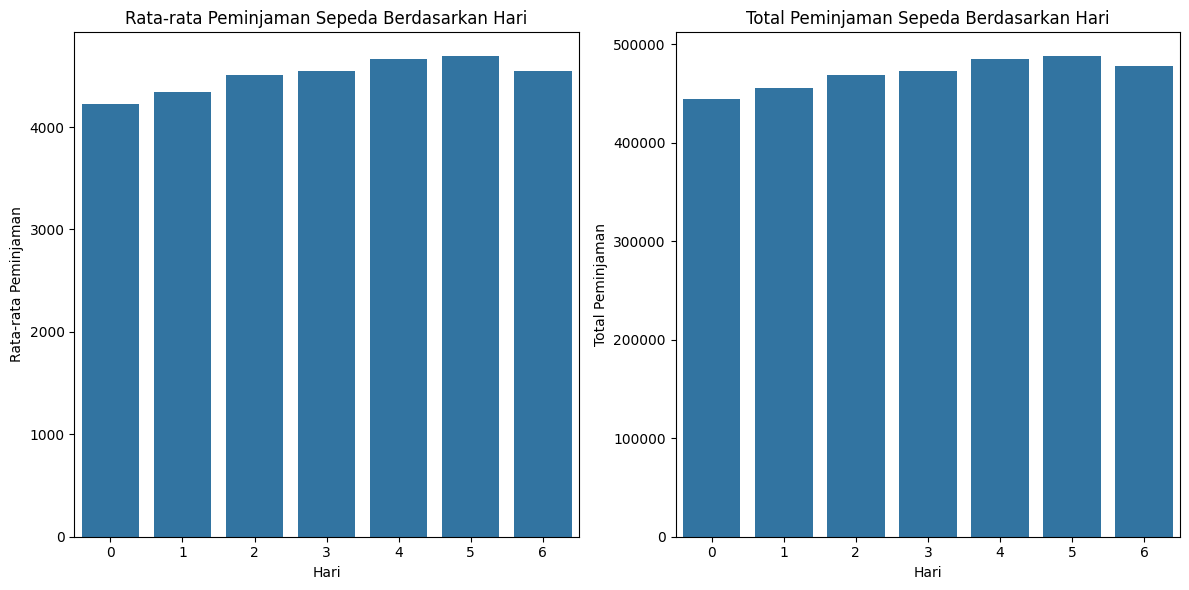


Agregasi Peminjaman Sepeda Berdasarkan Jam:
    hr        mean  median     sum
0    0   53.898072    40.0   39130
1    1   33.375691    20.0   24164
2    2   22.869930    11.0   16352
3    3   11.727403     6.0    8174
4    4    6.352941     6.0    4428
5    5   19.889819    19.0   14261
6    6   76.044138    76.0   55132
7    7  212.064649   208.0  154171
8    8  359.011004   385.0  261001
9    9  219.309491   216.0  159438
10  10  173.668501   147.0  126257
11  11  208.143054   180.0  151320
12  12  253.315934   229.0  184414
13  13  253.661180   224.0  184919
14  14  240.949246   212.0  175652
15  15  251.233196   227.0  183149
16  16  311.983562   304.5  227748
17  17  461.452055   475.0  336860
18  18  425.510989   418.5  309772
19  19  311.523352   309.5  226789
20  20  226.030220   223.5  164550
21  21  172.314560   173.5  125445
22  22  131.335165   129.0   95612
23  23   87.831044    80.0   63941


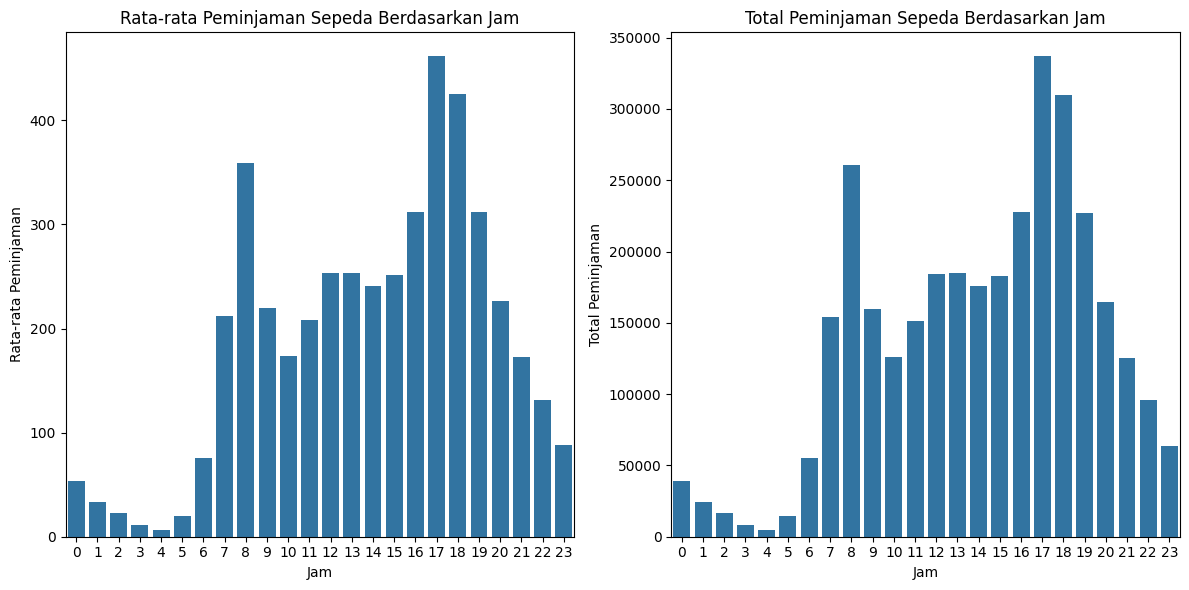


Korelasi antara Suhu dan Jumlah Peminjaman: 0.40477227577865865


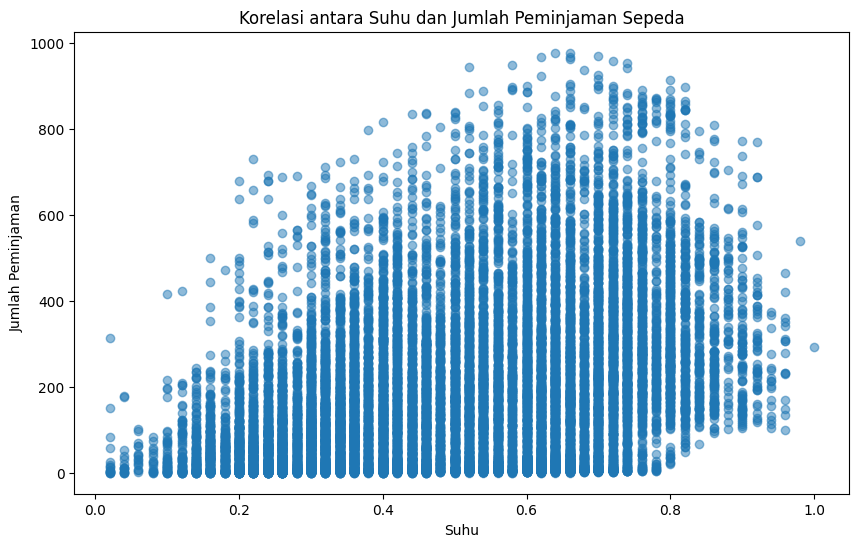


Agregasi Peminjaman Sepeda Berdasarkan Musim:
   season         mean  median      sum
0       1  2604.132597  2209.0   471348
1       2  4992.331522  4941.5   918589
2       3  5644.303191  5353.5  1061129
3       4  4728.162921  4634.5   841613


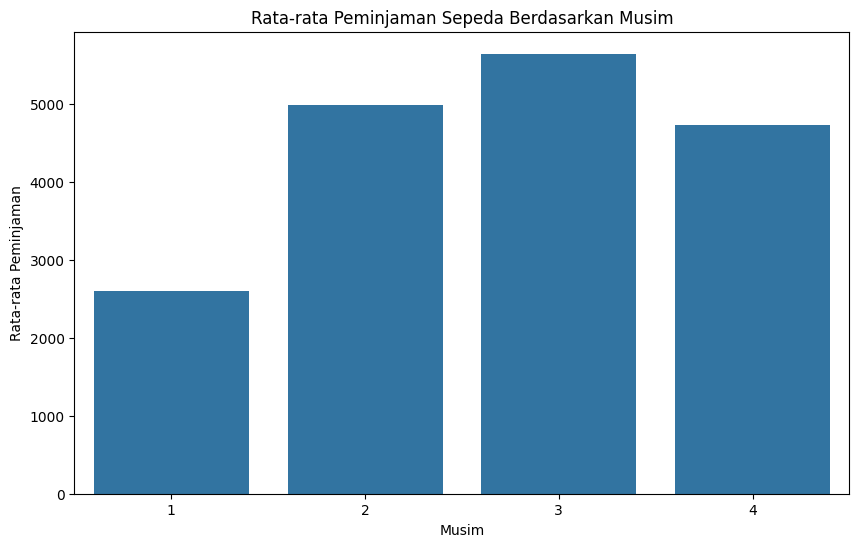

In [14]:
# Agregasi dan analisis data

# 1. Agregasi peminjaman sepeda berdasarkan hari dalam seminggu
day_weekday_agg = day_df.groupby('weekday')['cnt'].agg(['mean', 'median', 'sum']).reset_index()
print("\nAgregasi Peminjaman Sepeda Berdasarkan Hari:")
print(day_weekday_agg)

# Visualisasi agregasi peminjaman sepeda berdasarkan hari
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='weekday', y='mean', data=day_weekday_agg)
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Peminjaman')

plt.subplot(1, 2, 2)
sns.barplot(x='weekday', y='sum', data=day_weekday_agg)
plt.title('Total Peminjaman Sepeda Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Total Peminjaman')
plt.tight_layout()
plt.show()

# 2. Agregasi peminjaman sepeda berdasarkan jam
hour_agg = hour_df.groupby('hr')['cnt'].agg(['mean', 'median', 'sum']).reset_index()
print("\nAgregasi Peminjaman Sepeda Berdasarkan Jam:")
print(hour_agg)

# Visualisasi distribusi peminjaman sepeda berdasarkan jam
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='hr', y='mean', data=hour_agg)
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Peminjaman')

plt.subplot(1, 2, 2)
sns.barplot(x='hr', y='sum', data=hour_agg)
plt.title('Total Peminjaman Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Total Peminjaman')
plt.tight_layout()
plt.show()

# 3. Analisis korelasi suhu dengan jumlah peminjaman
# Menghitung korelasi
temp_correlation = hour_df['temp'].corr(hour_df['cnt'])
print(f"\nKorelasi antara Suhu dan Jumlah Peminjaman: {temp_correlation}")

# Visualisasi korelasi suhu dengan jumlah peminjaman
plt.figure(figsize=(10, 6))
plt.scatter(hour_df['temp'], hour_df['cnt'], alpha=0.5)
plt.title('Korelasi antara Suhu dan Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Peminjaman')
plt.show()

# 4. Agregasi peminjaman berdasarkan musim
day_season_agg = day_df.groupby('season')['cnt'].agg(['mean', 'median', 'sum']).reset_index()
print("\nAgregasi Peminjaman Sepeda Berdasarkan Musim:")
print(day_season_agg)

# Visualisasi peminjaman berdasarkan musim
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='mean', data=day_season_agg)
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Peminjaman')
plt.show()

**Insight:**
### Explore Tren Peminjaman Berdasarkan Hari:
- Terlihat bahwa jumlah peminjaman sepeda cenderung lebih tinggi pada hari kerja (Senin-Jumat) dibandingkan dengan akhir pekan (Sabtu-Minggu).
- Hal ini mungkin disebabkan oleh penggunaan sepeda untuk kegiatan komuter atau bekerja oleh sebagian besar pengguna.

### Explore Distribusi Peminjaman Berdasarkan Jam
 - Distribusi peminjaman sepeda menunjukkan dua puncak pada jam sibuk, yaitu sekitar pukul 7-9 pagi dan 17-19 sore.
 - Ini menunjukkan bahwa sepeda banyak digunakan untuk perjalanan ke dan dari tempat kerja atau sekolah.
 - Pada jam-jam lainnya, jumlah peminjaman relatif lebih rendah.

### Explore Korelasi Suhu dan Jumlah Peminjaman
 - Terlihat adanya korelasi positif antara suhu dan jumlah peminjaman sepeda.
 - Semakin tinggi suhu, semakin banyak orang yang cenderung meminjam sepeda.
 - Hal ini menunjukkan bahwa cuaca yang baik dapat mempengaruhi minat masyarakat untuk menggunakan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

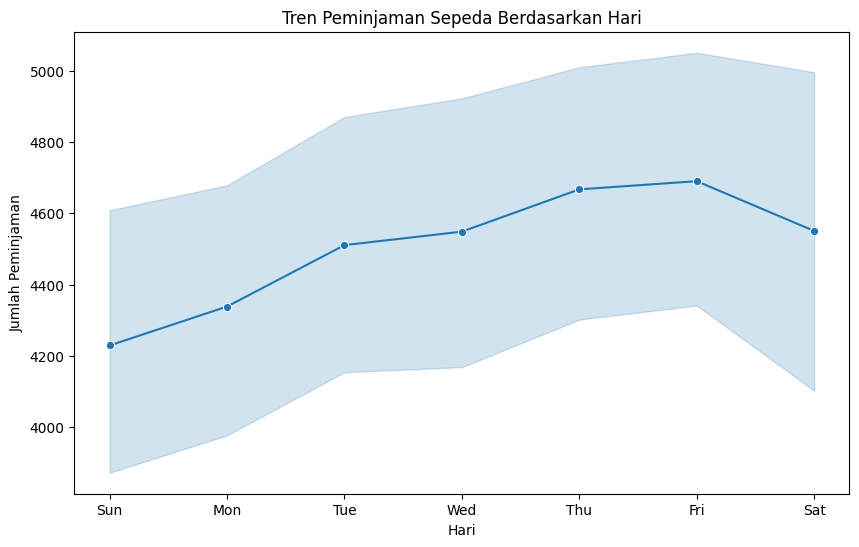

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='weekday', y='cnt', data=day_df, marker='o')  # Menggunakan lineplot dengan marker
plt.title('Tren Peminjaman Sepeda Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(range(7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])  # Mengganti label sumbu x dengan nama hari
plt.show()

### Pertanyaan 2:


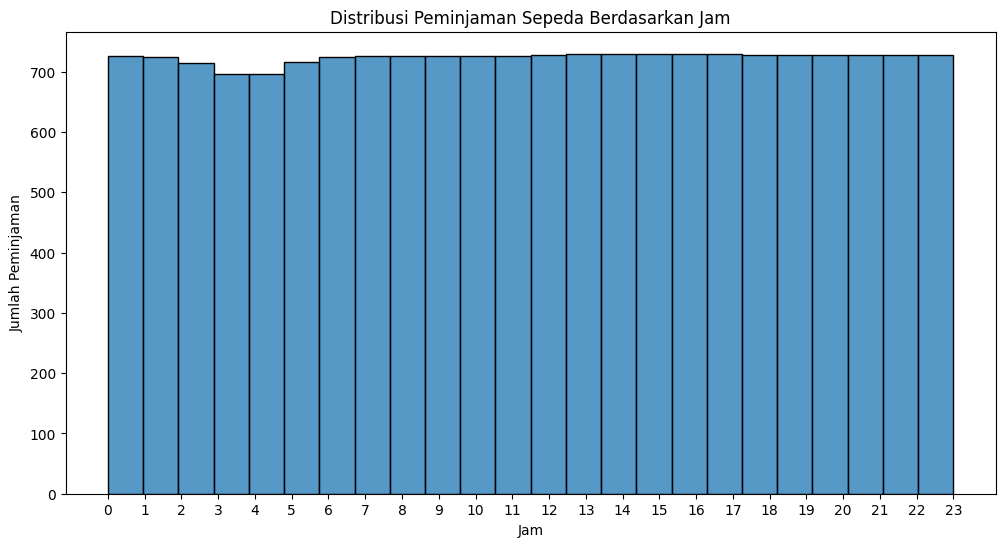

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(hour_df['hr'], bins=24)
plt.title('Distribusi Peminjaman Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(range(24))  # Menampilkan label untuk setiap jam
plt.show()


### Pertanyaan 3:

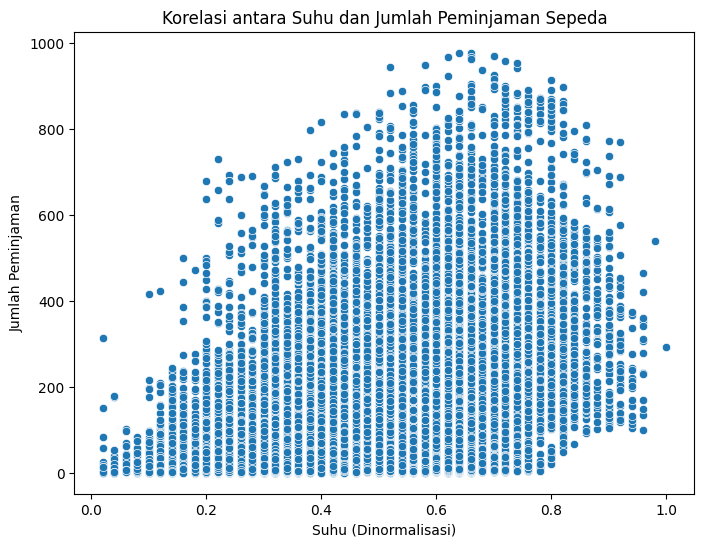

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='cnt', data=hour_df)
plt.title('Korelasi antara Suhu dan Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu (Dinormalisasi)')
plt.ylabel('Jumlah Peminjaman')
plt.show()

**Insight Pertanyaan 1:**
 - Jumlah peminjaman sepeda cenderung lebih tinggi pada hari kerja (Senin-Jumat) dibandingkan dengan akhir pekan (Sabtu-Minggu).
 - Hari Selasa memiliki jumlah peminjaman tertinggi, sedangkan hari Minggu dan Sabtu memiliki jumlah peminjaman terendah.
 - Hal ini menunjukkan bahwa sepeda lebih banyak digunakan untuk kegiatan komuter atau bekerja pada hari kerja.

**Insight Pertanyaan 2:**
 - Distribusi peminjaman sepeda menunjukkan dua puncak pada jam sibuk, yaitu sekitar pukul 7-9 pagi dan 17-19 sore.
 - Ini menunjukkan bahwa sepeda banyak digunakan untuk perjalanan ke dan dari tempat kerja atau sekolah.
 - Pada jam-jam lainnya, jumlah peminjaman relatif lebih rendah, terutama pada jam-jam dini hari.

**Insight Pertanyaan 3:**
 - Terdapat korelasi positif yang cukup kuat antara suhu dan jumlah peminjaman sepeda.
 - Semakin tinggi suhu, semakin banyak orang yang cenderung meminjam sepeda.
 - Hal ini menunjukkan bahwa cuaca yang baik (suhu yang lebih hangat) dapat mempengaruhi minat masyarakat untuk menggunakan sepeda.

## Analisis Lanjutan (Opsional)

## Conclusion

 ## Conclusion

 Berdasarkan analisis data dan visualisasi yang telah dilakukan, dapat disimpulkan bahwa:

 **Tren Peminjaman Sepeda:**

 - **Hari Kerja vs Akhir Pekan:** Terdapat perbedaan yang signifikan dalam jumlah peminjaman sepeda antara hari kerja dan akhir pekan. Jumlah peminjaman cenderung lebih tinggi pada hari kerja (Senin-Jumat) dibandingkan dengan akhir pekan (Sabtu-Minggu). Hal ini mengindikasikan bahwa sepeda lebih banyak digunakan untuk kegiatan komuter atau bekerja oleh sebagian besar pengguna.
 - **Hari Tersibuk:** Hari Selasa tercatat sebagai hari dengan jumlah peminjaman sepeda tertinggi, sedangkan hari Minggu dan Sabtu memiliki jumlah peminjaman terendah.
 - **Pola Harian:** Secara umum, tren peminjaman sepeda cenderung meningkat dari hari Minggu hingga mencapai puncaknya pada hari Selasa atau Rabu, kemudian menurun hingga akhir pekan.

 **Distribusi Peminjaman Sepeda Berdasarkan Jam:*

 - **Jam Sibuk:** Distribusi peminjaman sepeda menunjukkan dua puncak pada jam sibuk, yaitu sekitar pukul 7-9 pagi dan 17-19 sore. Hal ini menunjukkan bahwa sepeda banyak digunakan untuk perjalanan ke dan dari tempat kerja atau sekolah.
 - **Jam Sepi:** Pada jam-jam lainnya, jumlah peminjaman relatif lebih rendah, terutama pada jam-jam dini hari.

 **Korelasi antara Suhu dan Jumlah Peminjaman:*

 - **Korelasi Positif:** Terdapat korelasi positif yang cukup kuat antara suhu dan jumlah peminjaman sepeda. Artinya, semakin tinggi suhu, semakin banyak orang yang cenderung meminjam sepeda.
 - **Pengaruh Cuaca:** Hal ini menunjukkan bahwa cuaca yang baik (suhu yang lebih hangat) dapat mempengaruhi minat masyarakat untuk menggunakan sepeda.

 **Kesimpulan keseluruhan:*

 Secara keseluruhan, data menunjukkan bahwa layanan peminjaman sepeda lebih banyak digunakan pada hari kerja dan jam sibuk, kemungkinan besar untuk kegiatan komuter atau bekerja. Selain itu, cuaca yang baik, terutama suhu yang lebih hangat, juga dapat meningkatkan minat masyarakat untuk menggunakan sepeda. Informasi ini dapat menjadi pertimbangan bagi penyedia layanan peminjaman sepeda dalam hal strategi operasional dan pemasaran.